In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
data = pd.read_excel("employee_burnout_analysis.xlsx")
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [68]:
df=pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [69]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [70]:
df.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [71]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [72]:
# Fill missing values without using inplace
df['Mental Fatigue Score'] = df['Mental Fatigue Score'].fillna(value=7.1)
df['Resource Allocation'] = df['Resource Allocation'].fillna(value=6.0)
df['Burn Rate'] = df['Burn Rate'].fillna(value=df['Burn Rate'].mean())

In [73]:
data.corr(numeric_only=True)["Burn Rate"][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

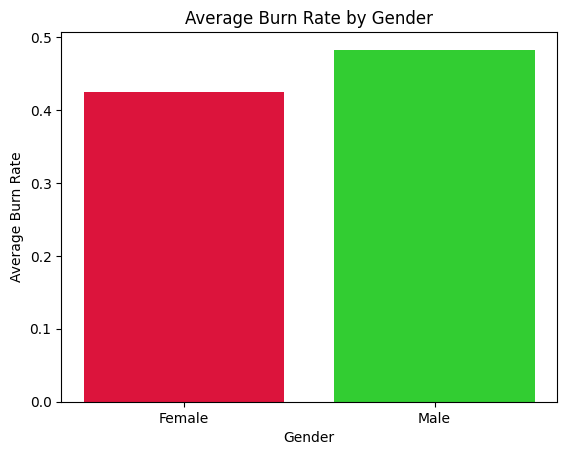

In [74]:
# Group by Gender and calculate the mean of Burn Rate
Avg_BR_Gender = df.groupby('Gender')['Burn Rate'].mean()

# Plot the bar graph
plt.bar(Avg_BR_Gender.index, Avg_BR_Gender.values, color=['#DC143C', '#32CD32'])
plt.xlabel("Gender")
plt.ylabel("Average Burn Rate")
plt.title("Average Burn Rate by Gender")
plt.show()

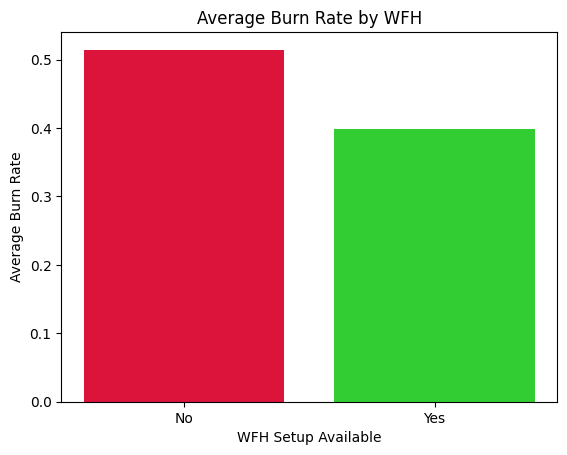

In [75]:
Avg_BR_WFH = df.groupby('WFH Setup Available')['Burn Rate'].mean()
plt.bar(Avg_BR_WFH.index,Avg_BR_WFH.values, color=['#DC143C', '#32CD32'])
plt.xlabel("WFH Setup Available")
plt.ylabel("Average Burn Rate")
plt.title("Average Burn Rate by WFH")
plt.show()

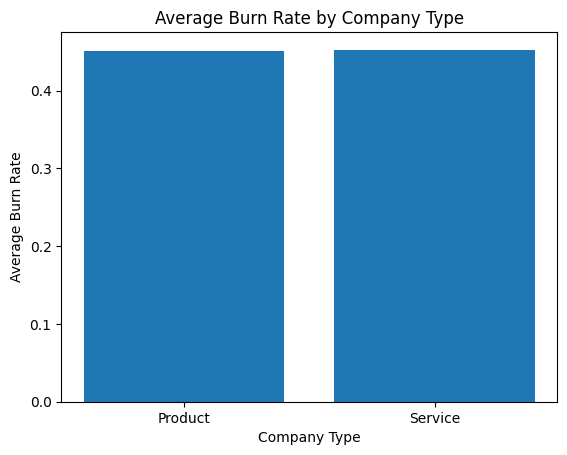

In [76]:
Avg_BR_CompType = df.groupby('Company Type')['Burn Rate'].mean()
plt.bar(Avg_BR_CompType.index,Avg_BR_CompType.values)
plt.xlabel("Company Type")
plt.ylabel("Average Burn Rate")
plt.title("Average Burn Rate by Company Type")
plt.show()

In [77]:
# Make a copy of the original data
encoded_data = df.copy()

# Encode non-numeric columns
label_encoder = LabelEncoder()
for col in encoded_data.columns:
    if encoded_data[col].dtype == 'object':  # Check if column is non-numeric
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
        
encoded_data


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,7722,2008-09-30,0,1,0,2,3.0,3.8,0.16
1,21062,2008-11-30,1,1,1,1,2.0,5.0,0.36
2,2381,2008-03-10,0,0,1,2,6.0,5.8,0.49
3,10790,2008-11-03,1,1,1,1,1.0,2.6,0.20
4,6810,2008-07-24,0,1,0,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,4208,2008-12-30,0,1,0,1,3.0,7.1,0.41
22746,14934,2008-01-19,0,0,1,3,6.0,6.7,0.59
22747,22181,2008-11-05,1,1,1,3,7.0,7.1,0.72
22748,16875,2008-01-10,0,1,0,2,5.0,5.9,0.52


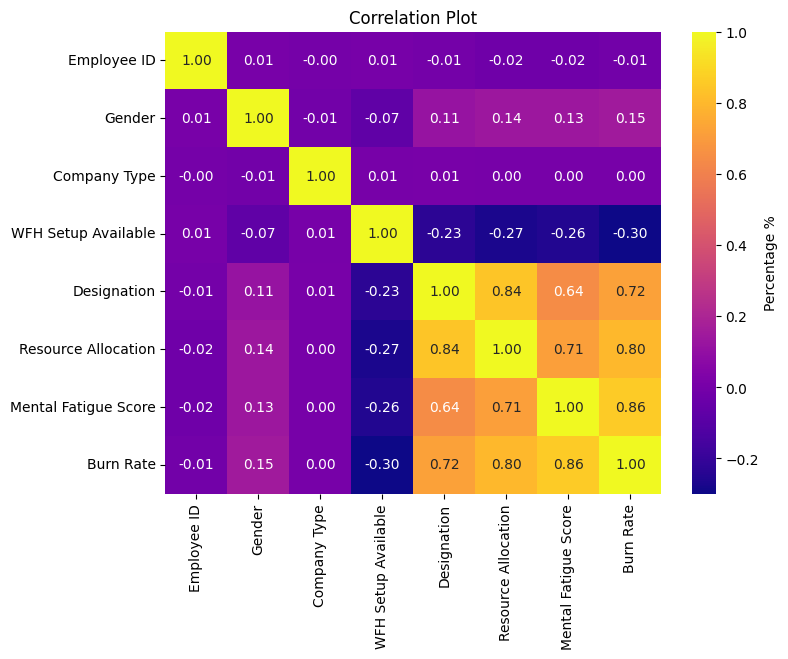

In [78]:
# Ensure only numeric columns are included for correlation
dat = encoded_data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
f, ax = plt.subplots(figsize=[8, 6])
sns.heatmap(
    dat.corr(),
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Percentage %'},
    cmap="plasma",
    ax=ax
)
ax.set_title("Correlation Plot")
plt.show()

In [79]:
Y = encoded_data["Burn Rate"]
X = encoded_data.drop(columns=['Burn Rate','Date of Joining'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1, shuffle=True)


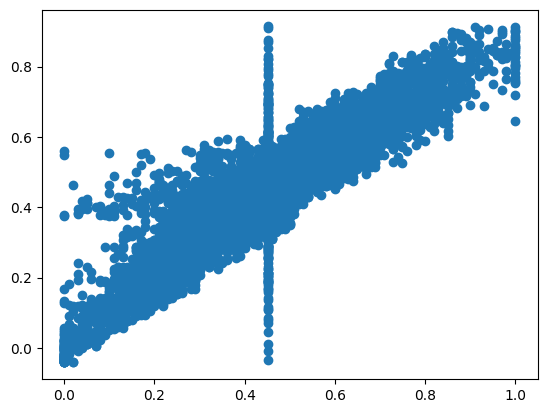

Mean Squared Error:  0.007033204782468511
R-squared: 0.8121917841103901


In [85]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

y_predicted = linear_regression.predict(X_test)

plt.scatter(Y_test, y_predicted)
plt.show()

mse = mean_squared_error(Y_test, y_predicted)
print("Mean Squared Error: ", mse)

r2 = r2_score(Y_test, y_predicted)
print(f'R-squared: {r2}')

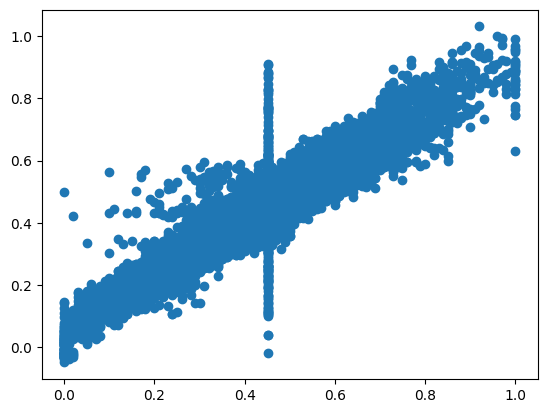

Mean Squared Error:  0.005840631362286104
R-squared: 0.8440371651691252


In [86]:
poly = PolynomialFeatures(degree=3)  # You can change the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, Y_train)

y_predicted_poly = poly_regression.predict(X_test_poly)

plt.scatter(Y_test, y_predicted_poly)
plt.show()

mse = mean_squared_error(Y_test, y_predicted_poly)
print("Mean Squared Error: ", mse)

r2 = r2_score(Y_test, y_predicted_poly)
print(f'R-squared: {r2}')

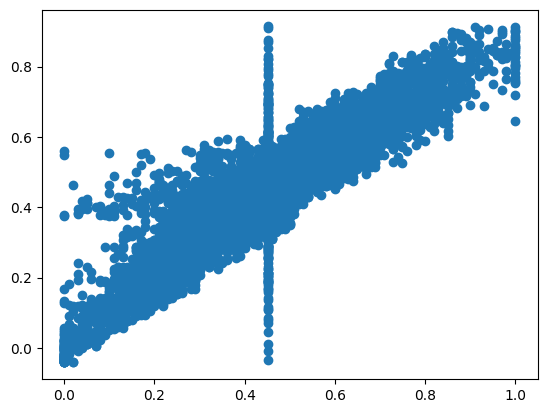

Mean Squared Error:  0.007033212066261573
R-squared: 0.8121915896106958


In [87]:
ridge_regression = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
ridge_regression.fit(X_train, Y_train)

y_predicted_ridge = ridge_regression.predict(X_test)

plt.scatter(Y_test, y_predicted_ridge)
plt.show()

mse = mean_squared_error(Y_test, y_predicted_ridge)
print("Mean Squared Error: ", mse)

r2 = r2_score(Y_test, y_predicted_ridge)
print(f'R-squared: {r2}')